In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
deliveries_data = pd.read_csv("C:/Users/HP/OneDrive/Desktop/IPL_Ball-by-Ball_2008-2020.csv")

In [5]:
deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [6]:
match_data = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\IPL_Matches_2008-2020.csv")

In [7]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [8]:
match_data.head(4)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper


In [9]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [10]:
#total matches played between 2008 - 2020
match_data.shape[0]

816

In [11]:
#number of unique venues the matches were played at
match_data['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

In [12]:
match_data['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [13]:
match_data['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

[Text(0, 0, 'Royal Challengers Bangalore'),
 Text(1, 0, 'Chennai Super Kings'),
 Text(2, 0, 'Rajasthan Royals'),
 Text(3, 0, 'Mumbai Indians'),
 Text(4, 0, 'Deccan Chargers'),
 Text(5, 0, 'Kings XI Punjab'),
 Text(6, 0, 'Kolkata Knight Riders'),
 Text(7, 0, 'Delhi Daredevils'),
 Text(8, 0, 'Kochi Tuskers Kerala'),
 Text(9, 0, 'Pune Warriors'),
 Text(10, 0, 'Sunrisers Hyderabad'),
 Text(11, 0, 'Gujarat Lions'),
 Text(12, 0, 'Rising Pune Supergiants'),
 Text(13, 0, 'Rising Pune Supergiant'),
 Text(14, 0, 'Delhi Capitals')]

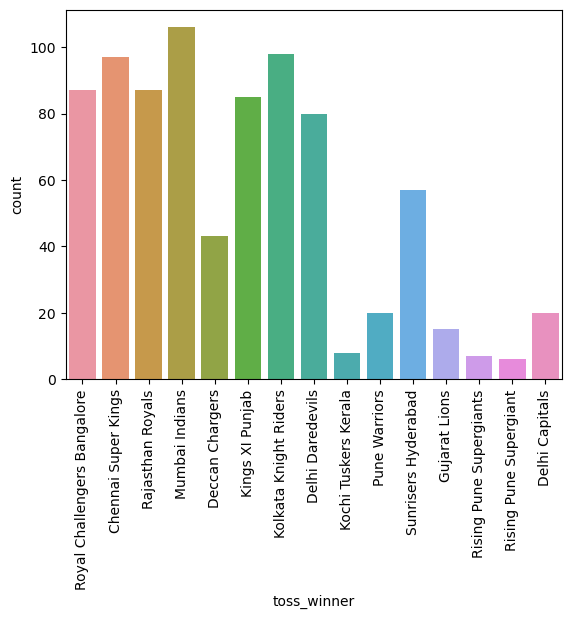

In [14]:
toss_winners = sns.countplot(x=match_data['toss_winner'])
toss_winners.set_xticklabels(toss_winners.get_xticklabels(),rotation=90)

In [15]:
#top 5 max player of match awards
match_data['player_of_match'].value_counts()[:5]

player_of_match
AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
Name: count, dtype: int64

In [16]:
max_player_of_match=match_data['player_of_match'].value_counts()[:5]

[Text(0.5, 0, 'player of the match'), Text(0, 0.5, 'number of awards')]

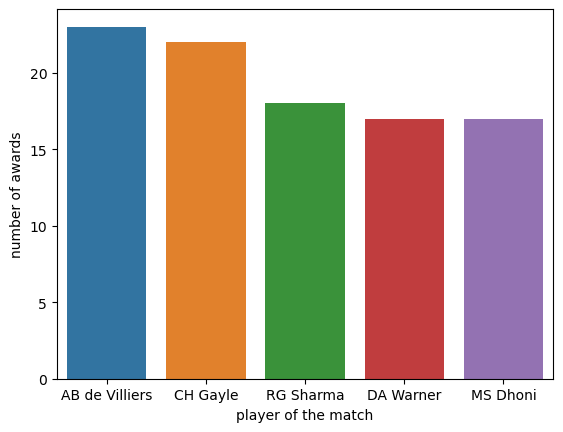

In [17]:
award_plot = sns.barplot(x=max_player_of_match.index,y=max_player_of_match.values)
award_plot.set(xlabel="player of the match",ylabel='number of awards')

In [18]:
#analysing virat kohli's stats

In [19]:
df_vk = deliveries_data[deliveries_data['batsman']=='V Kohli']

In [20]:
df_vk

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
211,335982,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
212,335982,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,0,0,NaN,NaN,NaN,legbyes,Royal Challengers Bangalore,Kolkata Knight Riders
213,335982,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
216,335982,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
217,335982,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,0,1,bowled,V Kohli,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192772,1237178,1,0,5,V Kohli,D Padikkal,Sandeep Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad
192773,1237178,1,0,6,V Kohli,D Padikkal,Sandeep Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad
192774,1237178,1,1,1,V Kohli,D Padikkal,JO Holder,2,0,2,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad
192775,1237178,1,1,2,V Kohli,D Padikkal,JO Holder,0,0,0,0,1,caught,V Kohli,SP Goswami,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad


In [21]:
df_vk.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [22]:
df_vk['dismissal_kind'].value_counts()

dismissal_kind
caught               105
bowled                30
run out               15
lbw                    7
stumped                3
caught and bowled      3
Name: count, dtype: int64

In [23]:
dismissal_df = df_vk['dismissal_kind'].value_counts()

[Text(0, 0, 'caught'),
 Text(1, 0, 'bowled'),
 Text(2, 0, 'run out'),
 Text(3, 0, 'lbw'),
 Text(4, 0, 'stumped'),
 Text(5, 0, 'caught and bowled')]

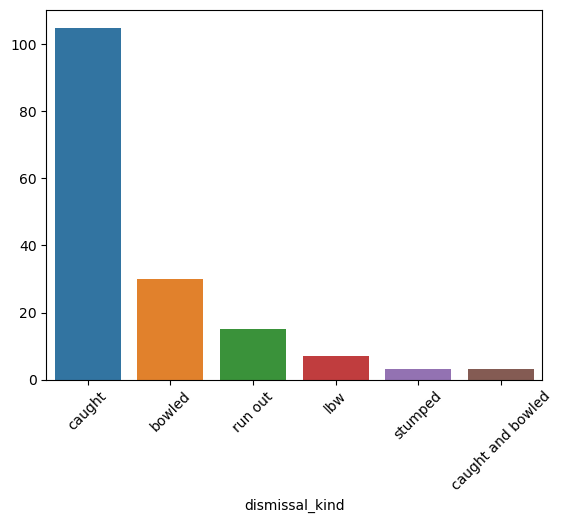

In [24]:
dismissal_plot = sns.barplot(x=dismissal_df.index,y=dismissal_df.values)
dismissal_plot.set_xticklabels(dismissal_plot.get_xticklabels(),rotation=45)

In [25]:
#analysing the runs scores trend
vk_runs_scored={}

In [26]:
df_vk['batsman_runs'].unique()

array([0, 1, 4, 6, 2, 3], dtype=int64)

In [27]:
df_vk[df_vk['batsman_runs']==1]

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
213,335982,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
851,335985,2,12,5,V Kohli,JH Kallis,AM Nayar,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Mumbai Indians
916,335985,2,10,1,V Kohli,JH Kallis,Harbhajan Singh,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Mumbai Indians
919,335985,2,10,4,V Kohli,JH Kallis,Harbhajan Singh,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Mumbai Indians
924,335985,2,11,3,V Kohli,JH Kallis,ST Jayasuriya,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Mumbai Indians
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192329,1216547,1,9,3,V Kohli,D Padikkal,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Mumbai Indians
192335,1216547,1,10,2,V Kohli,D Padikkal,RD Chahar,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Mumbai Indians
192342,1216547,1,11,3,V Kohli,D Padikkal,JJ Bumrah,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Mumbai Indians
192736,1237178,1,0,2,V Kohli,D Padikkal,Sandeep Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad


In [28]:
vk_runs_scored['ones']=len(df_vk[df_vk['batsman_runs']==1])

In [29]:
vk_runs_scored["two's"]=len(df_vk[df_vk['batsman_runs']==2]*2)

In [30]:
vk_runs_scored['threes']=len(df_vk[df_vk['batsman_runs']==3]*3)

In [31]:
vk_runs_scored['fours']=len(df_vk[df_vk['batsman_runs']==4]*4)

In [32]:
vk_runs_scored['sixes']=len(df_vk[df_vk['batsman_runs']==6]*6)

In [34]:
vk_runs_scored

{'ones': 1919, "two's": 346, 'threes': 13, 'fours': 504, 'sixes': 202}

([<matplotlib.patches.Wedge at 0x1dec3124310>,
 [Text(-0.47801724297389164, 0.9907065738247828, 'ones'),
  Text(-0.3328620546880361, -1.0484287541596993, "two's"),
  Text(0.07752787544680445, -1.0972645207645715, 'threes'),
  Text(0.6345128173320088, -0.8985507690951008, 'fours'),
  Text(1.0752183415749488, -0.23217561874756992, 'sixes')],
 [Text(-0.26073667798575906, 0.5403854039044269, '64.3%'),
  Text(-0.18156112073892874, -0.5718702295416541, '11.6%'),
  Text(0.04228793206189333, -0.5985079204170389, '0.4%'),
  Text(0.3460979003629138, -0.4901186013246004, '16.9%'),
  Text(0.5864827317681538, -0.1266412465895836, '6.8%')])

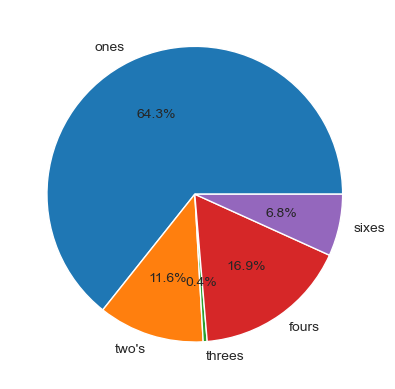

In [39]:
sns.set_style("darkgrid")
plt.pie(vk_runs_scored.values(),labels=vk_runs_scored.keys(),autopct='%1.1f%%')

In [42]:
#toss decision across seasons
match_data['season']=pd.to_datetime(match_data['date']).dt.year

In [44]:
match_data

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020


In [45]:
match_data.groupby(['season','toss_decision']).size()

season  toss_decision
2008    bat              26
        field            32
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    bat              25
        field            48
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    bat              19
        field            41
2015    bat              25
        field            34
2016    bat              11
        field            49
2017    bat              11
        field            48
2018    bat              10
        field            50
2019    bat              10
        field            50
2020    bat              27
        field            33
dtype: int64

In [47]:
season_toss_count_df=match_data.groupby(['season','toss_decision']).size().reset_index().rename(columns={0:'count'})

In [48]:
season_toss_count_df

,season,toss_decision,count
0,2008,bat,26
1,2008,field,32
2,2009,bat,35
3,2009,field,22
4,2010,bat,39
5,2010,field,21
6,2011,bat,25
7,2011,field,48
8,2012,bat,37
9,2012,field,37


<Axes: xlabel='season', ylabel='count'>

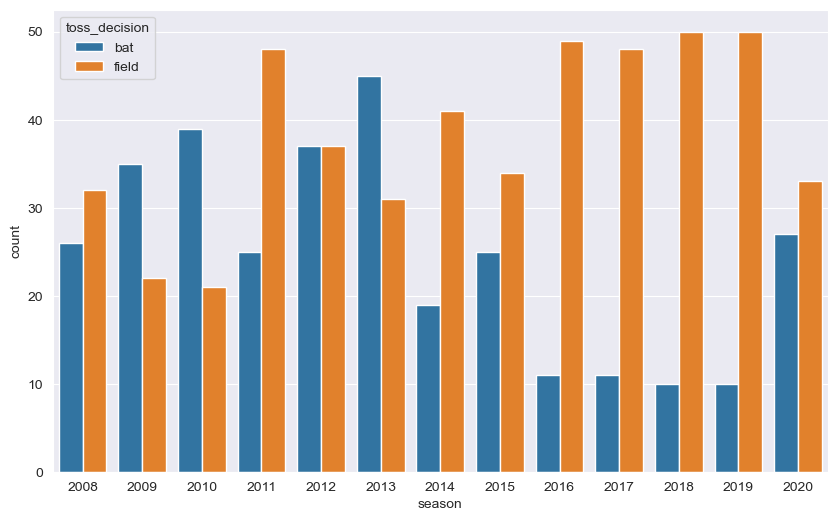

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x='season',y='count',hue='toss_decision',data=season_toss_count_df)

In [51]:
# matches where teams have won the toss and won the match 
match_data['toss_win_game_win']=np.where(match_data['toss_winner']==match_data['winner'],'Yes','No')

In [52]:
match_data

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season,toss_win_game_win
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,No
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,Yes
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,No
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,No
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020,No
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020,No
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020,Yes
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020,Yes


In [53]:
labels = match_data['toss_win_game_win'].value_counts().index
values=match_data['toss_win_game_win'].value_counts().values

([<matplotlib.patches.Wedge at 0x1dec9f58cd0>,
 [Text(-0.042339411351007016, 1.0991848680938299, 'Yes'),
  Text(0.04233941135100639, -1.09918486809383, 'No')],
 [Text(-0.023094224373276552, 0.5995553825966344, '51.2%'),
  Text(0.02309422437327621, -0.5995553825966345, '48.8%')])

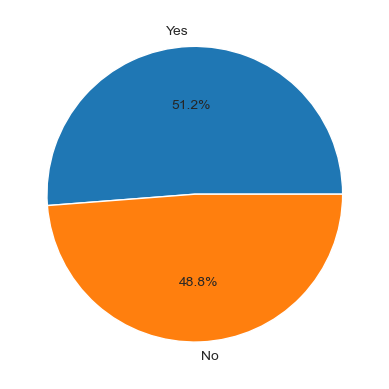

In [54]:
sns.set_style('darkgrid')
plt.pie(values,labels=labels,autopct='%1.1f%%')

In [56]:
matches_played = match_data['team1'].value_counts()+match_data['team2'].value_counts()


In [57]:
matches_played

Chennai Super Kings            178
Deccan Chargers                 75
Delhi Capitals                  33
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                190
Kochi Tuskers Kerala            14
Kolkata Knight Riders          192
Mumbai Indians                 203
Pune Warriors                   46
Rajasthan Royals               161
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    195
Sunrisers Hyderabad            124
Name: count, dtype: int64

In [58]:
#converting to a dataframe
matches_played_df=matches_played.to_frame().reset_index()
matches_played_df.columns=['team_name','matches_played']

In [59]:
matches_played_df

,team_name,matches_played
0,Chennai Super Kings,178
1,Deccan Chargers,75
2,Delhi Capitals,33
3,Delhi Daredevils,161
4,Gujarat Lions,30
5,Kings XI Punjab,190
6,Kochi Tuskers Kerala,14
7,Kolkata Knight Riders,192
8,Mumbai Indians,203
9,Pune Warriors,46


In [60]:
wins=pd.DataFrame(match_data['winner'].value_counts()).reset_index()

In [61]:
wins.columns=['team_name','wins']

In [62]:
wins

,team_name,wins
0,Mumbai Indians,120
1,Chennai Super Kings,106
2,Kolkata Knight Riders,99
3,Royal Challengers Bangalore,91
4,Kings XI Punjab,88
5,Rajasthan Royals,81
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,66
8,Deccan Chargers,29
9,Delhi Capitals,19


In [63]:
played=matches_played_df.merge(wins,on='team_name',how='inner')

In [64]:
played

,team_name,matches_played,wins
0,Chennai Super Kings,178,106
1,Deccan Chargers,75,29
2,Delhi Capitals,33,19
3,Delhi Daredevils,161,67
4,Gujarat Lions,30,13
5,Kings XI Punjab,190,88
6,Kochi Tuskers Kerala,14,6
7,Kolkata Knight Riders,192,99
8,Mumbai Indians,203,120
9,Pune Warriors,46,12


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Chennai Super Kings'),
  Text(1, 0, 'Deccan Chargers'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Delhi Daredevils'),
  Text(4, 0, 'Gujarat Lions'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Kochi Tuskers Kerala'),
  Text(7, 0, 'Kolkata Knight Riders'),
  Text(8, 0, 'Mumbai Indians'),
  Text(9, 0, 'Pune Warriors'),
  Text(10, 0, 'Rajasthan Royals'),
  Text(11, 0, 'Rising Pune Supergiant'),
  Text(12, 0, 'Rising Pune Supergiants'),
  Text(13, 0, 'Royal Challengers Bangalore'),
  Text(14, 0, 'Sunrisers Hyderabad')])

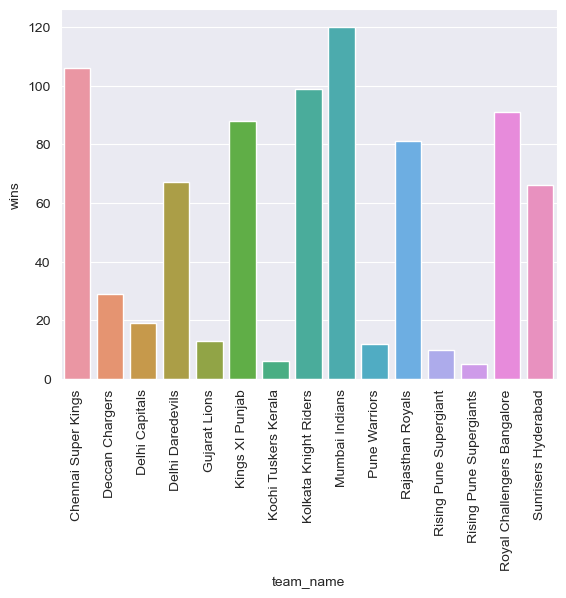

In [65]:
sns.barplot(x='team_name',y='wins',data=played)
plt.xticks(rotation=90)

In [67]:
#extra runs conceeded by bowling team
deliveries_data.groupby('bowling_team')["extra_runs"].sum()

bowling_team
Chennai Super Kings            1301
Deccan Chargers                 659
Delhi Capitals                  230
Delhi Daredevils               1268
Gujarat Lions                   188
Kings XI Punjab                1567
Kochi Tuskers Kerala            110
Kolkata Knight Riders          1461
Mumbai Indians                 1716
Pune Warriors                   330
Rajasthan Royals               1352
Rising Pune Supergiant          111
Rising Pune Supergiants         108
Royal Challengers Bangalore    1670
Sunrisers Hyderabad             757
Name: extra_runs, dtype: int64